In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from tensorflow.keras.callbacks import EarlyStopping

In [2]:
dataset_path = r'C:\Users\Fidha\Downloads\archive (10)/RSCCASN.csv'

In [3]:
sales_data = pd.read_csv(dataset_path,  parse_dates=True, index_col='DATE')

In [4]:
sales_data

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [5]:
type(sales_data)

pandas.core.frame.DataFrame

In [6]:
len(sales_data)

334

In [7]:
sales_data.columns

Index(['RSCCASN'], dtype='object')

In [8]:
sales_data.columns = ['Sales']

In [9]:
sales_data.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [10]:
sales_data.columns

Index(['Sales'], dtype='object')

In [11]:
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB
None


In [12]:
sales_data.describe()

,Sales
count,334.000000
mean,16325.095808
std,5369.839014
min,6938.000000
25%,12298.500000
50%,15878.500000
75%,19772.500000
max,34706.000000


<AxesSubplot:xlabel='DATE'>

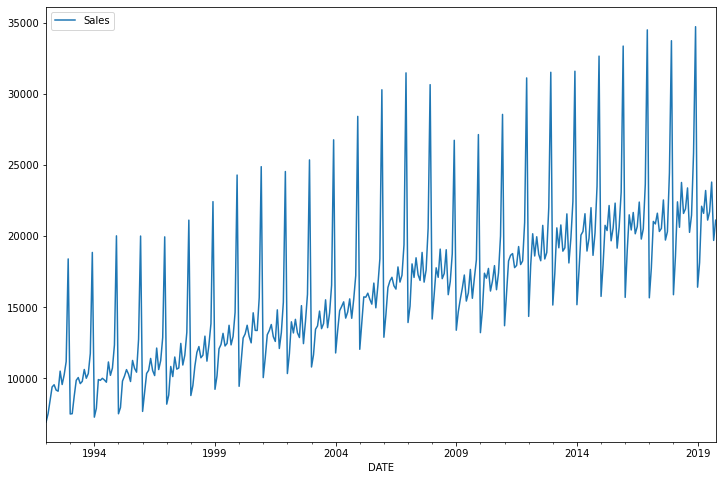

In [13]:
sales_data.plot(figsize=(12, 8))


In [14]:
len(sales_data)
len(sales_data) - 18    # 1.5 year
test_size = 18
test_index = len(sales_data) - test_size
test_index

316

In [15]:
train = sales_data.iloc[:test_index]
test = sales_data.iloc[test_index:]

In [16]:
train.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [17]:
test.head()

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260


In [18]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [19]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [20]:
scaled_train[:5]

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053]])

In [21]:
length = 12

In [22]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [23]:
X, y = generator[0]

In [24]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [25]:
y

array([[0.02047633]])

In [26]:
len(X[0])

12

In [27]:
# LSTM:
n_features = 1

In [28]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [30]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [31]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [32]:
model.fit(generator, epochs=20, 
          validation_data=validation_generator,
          callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 5s 10ms/step - loss: 0.0226 - val_loss: 0.0081
Epoch 2/20
304/304 [==============================] - 3s 8ms/step - loss: 0.0182 - val_loss: 0.0194
Epoch 3/20
304/304 [==============================] - 3s 8ms/step - loss: 0.0092 - val_loss: 0.0013
Epoch 4/20
304/304 [==============================] - 3s 8ms/step - loss: 0.0057 - val_loss: 0.0015
Epoch 5/20
304/304 [==============================] - 3s 8ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 6/20
304/304 [==============================] - 3s 8ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 7/20
304/304 [==============================] - 3s 8ms/step - loss: 0.0022 - val_loss: 9.4168e-04
Epoch 8/20
304/304 [==============================] - 3s 8ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 9/20
304/304 [==============================] - 3s 8ms/step - loss: 0.0014 - val_loss: 0.0056


In [33]:
losses = pd.DataFrame(model.history.history)

In [34]:
losses

,loss,val_loss
0,0.022649,0.008090
1,0.018154,0.019401
2,0.009192,0.001343
3,0.005665,0.001468
4,0.002199,0.001238
5,0.001466,0.001141
6,0.002207,0.000942
7,0.001660,0.002521
8,0.001399,0.005645


<AxesSubplot:>

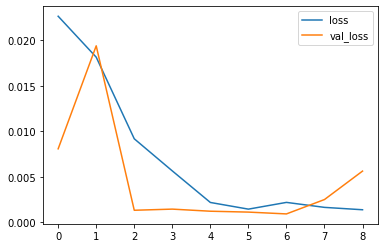

In [35]:
losses.plot()

In [36]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time  stamp ahead 
    current_pred = model.predict(current_batch)[0]
    
    # store prediction 
    test_predictions.append(current_pred)
    
    # update batch to now include prediction and drop first value 
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

true_prediction = scaler.inverse_transform(test_predictions)

1/1 [==============================] - 0s 32ms/step


In [37]:
test['Predictions'] = true_prediction

C:\Users\Fidha\AppData\Local\Temp/ipykernel_7400/1596403840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_prediction


In [38]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,23228.458149
2018-06-01,21589,21979.361958
2018-07-01,21919,22187.885593
2018-08-01,23381,24241.569147
2018-09-01,20260,21562.135736
2018-10-01,21473,22289.418001
2018-11-01,25831,26531.651616
2018-12-01,34706,37773.463161
2019-01-01,16410,17307.559442


<AxesSubplot:xlabel='DATE'>

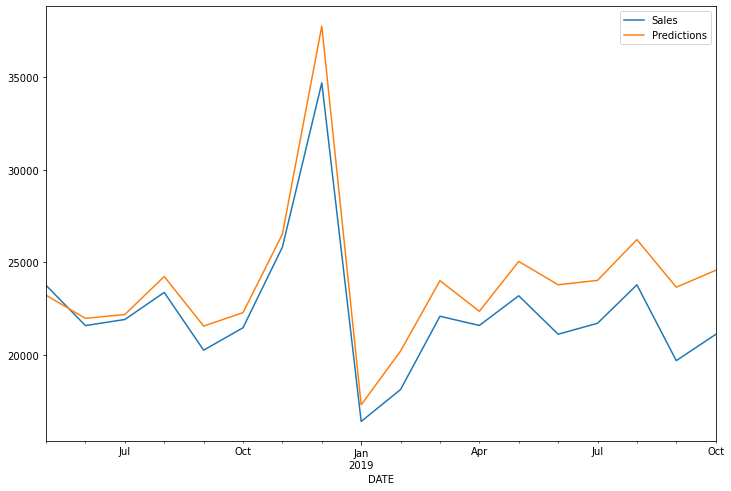

In [39]:
test.plot(figsize=(12, 8))

In [40]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(sales_data)

In [41]:
length = 12
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, 
                                length=length, batch_size=1)

In [42]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(generator, epochs=8)

Epoch 1/8
322/322 [==============================] - 5s 8ms/step - loss: 0.0253
Epoch 2/8
322/322 [==============================] - 3s 8ms/step - loss: 0.0168
Epoch 3/8
322/322 [==============================] - 3s 8ms/step - loss: 0.0088
Epoch 4/8
322/322 [==============================] - 3s 8ms/step - loss: 0.0033
Epoch 5/8
322/322 [==============================] - 3s 8ms/step - loss: 0.0023
Epoch 6/8
322/322 [==============================] - 3s 8ms/step - loss: 0.0017
Epoch 7/8
322/322 [==============================] - 3s 8ms/step - loss: 0.0019
Epoch 8/8
322/322 [==============================] - 3s 8ms/step - loss: 0.0022


In [43]:
forecast = []
# Replace periods with whatever forecast lengt you want 
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time  stamp ahead 
    current_pred = model.predict(current_batch)[0]
    
    # store prediction 
    forecast.append(current_pred)
    
    # update batch to now include prediction and drop first value 
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 32ms/step


In [44]:
forecast = scaler.inverse_transform(forecast)

In [45]:
sales_data

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [46]:
forecast

array([[26782.22540236],
       [36808.40947819],
       [17262.43757582],
       [18828.42441702],
       [22345.58063793],
       [21904.43411398],
       [23558.63220072],
       [21556.00872374],
       [22183.06213045],
       [24286.28057575],
       [20548.81541467],
       [21973.7340374 ]])

In [47]:
forecast_index = pd.date_range(start='2019-11-01', periods=periods,
                              freq='MS')

In [48]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [49]:
forecast_data = pd.DataFrame(data=forecast, index=forecast_index, 
                             columns=['Forecast'])

In [50]:
forecast_data

,Forecast
2019-11-01,26782.225402
2019-12-01,36808.409478
2020-01-01,17262.437576
2020-02-01,18828.424417
2020-03-01,22345.580638
2020-04-01,21904.434114
2020-05-01,23558.632201
2020-06-01,21556.008724
2020-07-01,22183.062130
2020-08-01,24286.280576


<AxesSubplot:>

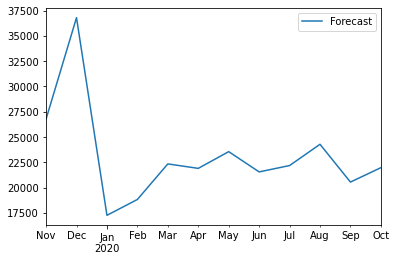

In [51]:
forecast_data.plot()

<AxesSubplot:xlabel='DATE'>

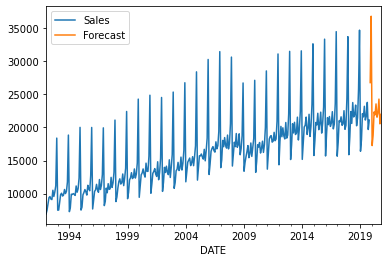

In [52]:
ax = sales_data.plot()
forecast_data.plot(ax=ax)

(576.0, 611.0)

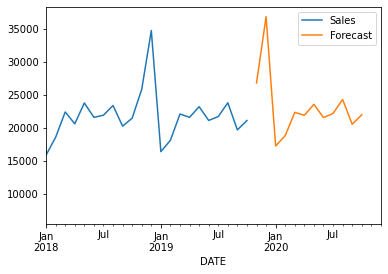

In [53]:
ax = sales_data.plot()
forecast_data.plot(ax=ax)
plt.xlim('2018-01-01', '2020-12-01')